### Paso 1: Generar y visualizar los datos

En este primer paso generamos un conjunto de datos sintético utilizando `make_regression`.

- Tendremos 100 puntos distribuidos alrededor de una relación lineal.
- Agregamos **ruido aleatorio** para simular variabilidad real.
- La visualización en 2D nos permitirá observar la forma general de los datos antes de entrenar cualquier modelo.

Esta gráfica servirá como punto de partida para comparar cómo distintos modelos intentan ajustarse a los mismos datos.

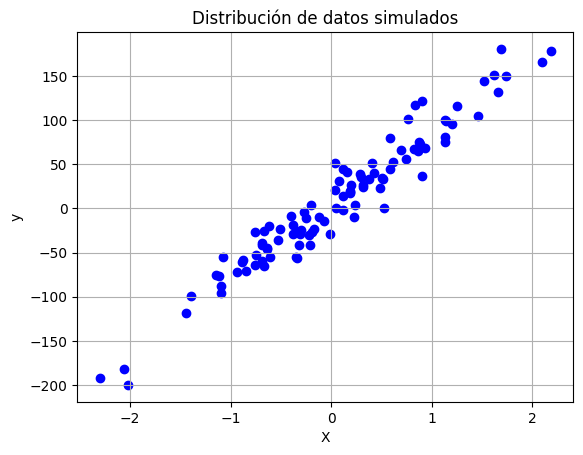

In [1]:
# Paso 1: Importamos las librerías necesarias
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

# Generamos un conjunto de datos sintético
# 🔹 100 muestras
# 🔹 1 característica (X)
# 🔹 Ruido aleatorio para simular datos reales
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

# Visualizamos los datos en un diagrama de dispersión
plt.scatter(X, y, color='blue')
plt.title("Distribución de datos simulados")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()


### Paso 2: Entrenar modelos con distintas complejidades

Ahora entrenaremos **tres modelos de regresión polinomial**, cada uno con diferente nivel de complejidad:

- **Grado 1:** un modelo lineal (muy simple).
- **Grado 4:** un modelo moderadamente flexible.
- **Grado 15:** un modelo muy complejo que puede capturar detalles minúsculos (e incluso ruido).

Cada modelo será visualizado sobre los mismos datos para que podamos **comparar gráficamente**:

¿Cuál modelo ignora la forma de los datos?  
¿Cuál se adapta correctamente?  
¿Cuál parece "memorizar" todos los puntos?

Este análisis es clave para comprender **subajuste, ajuste adecuado y sobreajuste**.



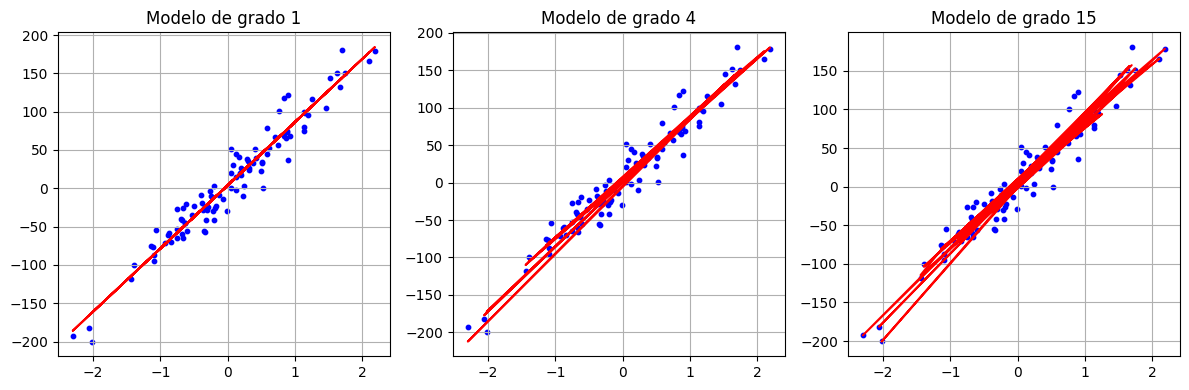

In [2]:
# Paso 2: Entrenamos modelos de regresión polinomial con diferentes grados

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Definimos tres niveles de complejidad: simple (1), medio (4), complejo (15)
grados = [1, 4, 15]

# Creamos una figura con 3 gráficos lado a lado
plt.figure(figsize=(12, 4))

# Para cada grado, entrenamos y visualizamos el modelo correspondiente
for i, grado in enumerate(grados):
    # Convertimos X en variables polinomiales según el grado
    poly = PolynomialFeatures(degree=grado)
    X_poly = poly.fit_transform(X)

    # Creamos y entrenamos el modelo
    modelo = LinearRegression().fit(X_poly, y)

    # Realizamos predicciones con los mismos datos
    y_pred = modelo.predict(X_poly)

    # Dibujamos el gráfico: puntos reales (azul) y predicciones (línea roja)
    plt.subplot(1, 3, i+1)
    plt.scatter(X, y, color='blue', s=10)
    plt.plot(X, y_pred, color='red')
    plt.title(f'Modelo de grado {grado}')
    plt.grid(True)
    plt.tight_layout()

# Mostramos los 3 gráficos juntos
plt.show()
